partial differential equation (PDE)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_kernel(a):
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    """A simplified 2D convolution operation"""
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
    [1.0, -6., 1.0],
    [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

sess = tf.InteractiveSession()

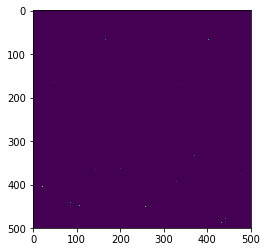

In [3]:
N = 500

# Initial Conditions -- some rain drops hit a pond
# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# Some rain drops hit a pond at random points
for n in range(100):
    a,b = np.random.randint(0, N, 2)
    u_init[a,b] = np.random.uniform()
plt.imshow(u_init)
plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


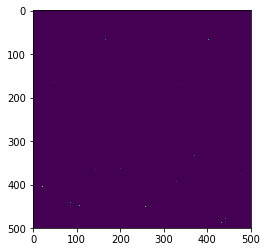

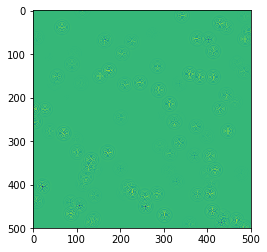

In [5]:
# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(U.assign(U_), Ut.assign(Ut_))

# Initialize state to initial conditions
tf.initialize_all_variables().run()

# Run 1000 steps of PDE
for i in range(1000):
    # Step simulation
    step.run({eps: 0.03, damping: 0.04})
    # Visualize every 50 steps
    if i % 500 == 0:
        plt.imshow(U.eval())
        plt.show()